<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/excercise1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

##Μέρος 1 – Λογιστική Παλινδρόμηση

# ΕΡΩΤΗΜΑ 1

In [ ]:
df = pd.read_csv('diabetes.csv')
print(df.describe().loc[['mean','std','min','max']])

      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean     3.845052  120.894531      69.105469      20.536458   79.799479   
std      3.369578   31.972618      19.355807      15.952218  115.244002   
min      0.000000    0.000000       0.000000       0.000000    0.000000   
max     17.000000  199.000000     122.000000      99.000000  846.000000   

            BMI  DiabetesPedigreeFunction        Age   Outcome  
mean  31.992578                  0.471876  33.240885  0.348958  
std    7.884160                  0.331329  11.760232  0.476951  
min    0.000000                  0.078000  21.000000  0.000000  
max   67.100000                  2.420000  81.000000  1.000000  


---- histograms ----

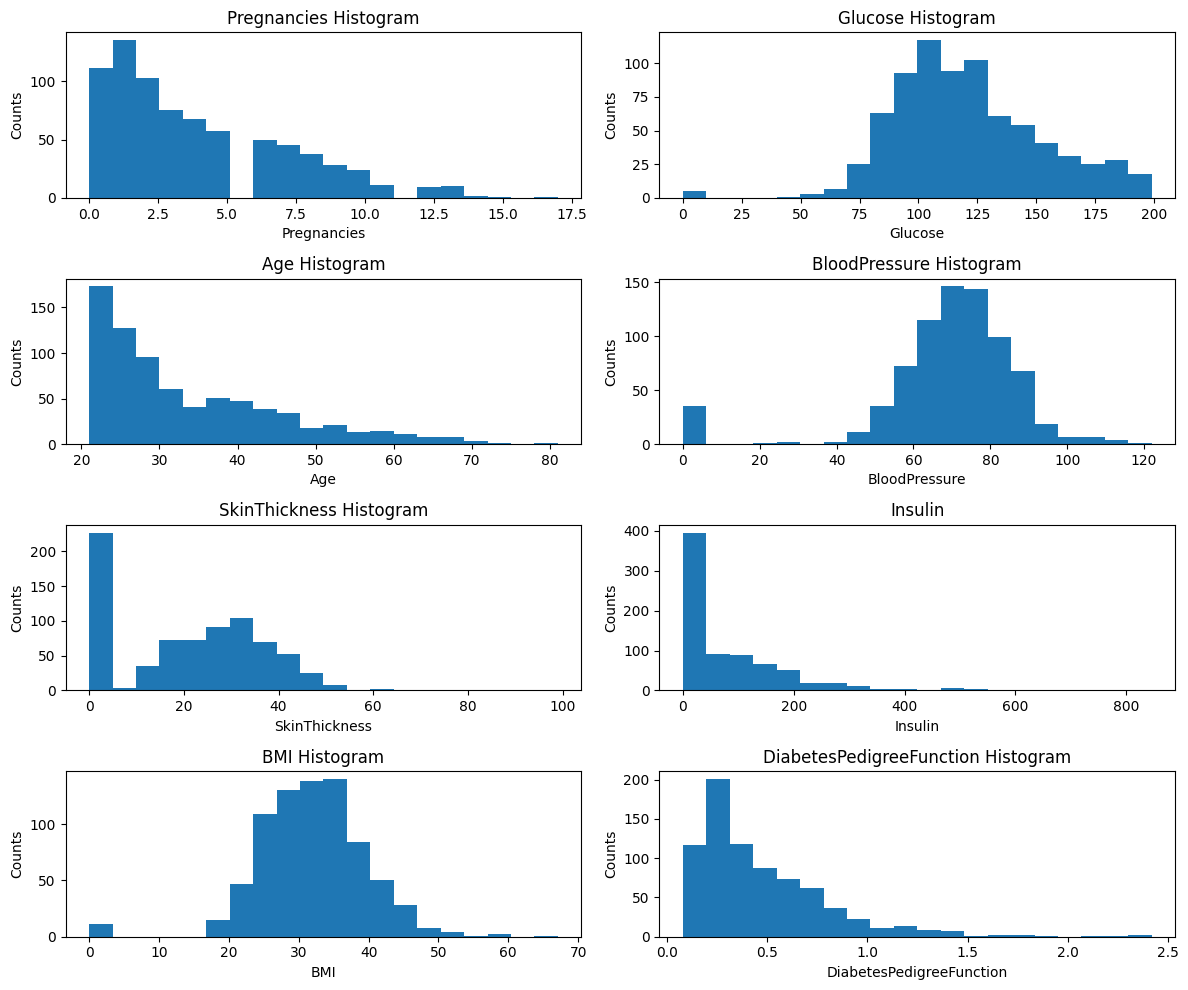

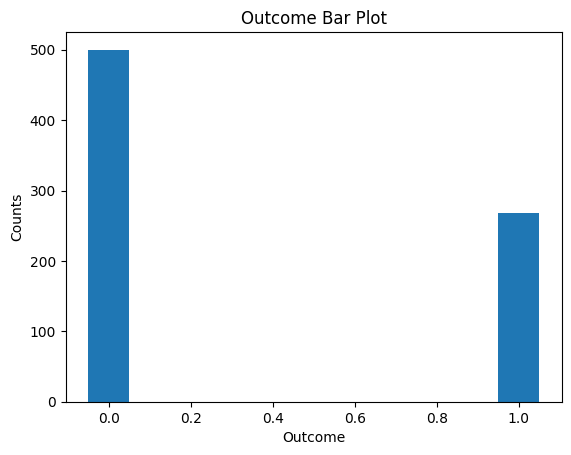

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
axes = axes.flatten()

axes[0].hist(df['Pregnancies'], bins=20)
axes[0].set_title('Pregnancies Histogram')
axes[0].set_xlabel('Pregnancies')
axes[0].set_ylabel('Counts')

axes[1].hist(df['Glucose'], bins=20)
axes[1].set_title('Glucose Histogram')
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Counts')

axes[2].hist(df['Age'], bins=20)
axes[2].set_title('Age Histogram')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Counts')

axes[3].hist(df['BloodPressure'], bins=20)
axes[3].set_title('BloodPressure Histogram')
axes[3].set_xlabel('BloodPressure')
axes[3].set_ylabel('Counts')

axes[4].hist(df['SkinThickness'], bins=20)
axes[4].set_title('SkinThickness Histogram')
axes[4].set_xlabel('SkinThickness')
axes[4].set_ylabel('Counts')

axes[5].hist(df['Insulin'], bins=20)
axes[5].set_title('Insulin')
axes[5].set_xlabel('Insulin')
axes[5].set_ylabel('Counts')

axes[6].hist(df['BMI'], bins=20)
axes[6].set_title('BMI Histogram')
axes[6].set_xlabel('BMI')
axes[6].set_ylabel('Counts')

axes[7].hist(df['DiabetesPedigreeFunction'], bins=20)
axes[7].set_title('DiabetesPedigreeFunction Histogram')
axes[7].set_xlabel('DiabetesPedigreeFunction')
axes[7].set_ylabel('Counts')

plt.tight_layout()
plt.show()




plt.bar(df['Outcome'].value_counts().index, df['Outcome'].value_counts().values, width=0.1)
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()


#ΕΡΩΤΗΜΑ 2

Η ποιότητα των δεδομένων φαίνεται να είναι κακή. Συγκεκριμένα παρατηρείται από τα ιστογράμματα ότι οι τιμές των μεταβλητών δεν είναι σε πολλές περιπτώσεις ίσα κατανεμημένες (πχ Age, Insulin) ενώ σε μερκές περιπτώσεις υπάρχει μεγάλη συγκέντρωση σε συγκεκριμένες τιμές μόνο (πχ Insulin, Diabetes Pedigree Function). Αυτό μπορεί πιθανως να οδηγήσει σε εντοπισμό λάθος μοτίβων και σε χαμηλή ικανότητα γενίκευσης. Επίσης παρατηρείται ότι σε κάποια χαρακτηριστικά υπάρχει ασυνέχεια στις κατανομές, δηλαδή έχει κενά στις τιμές του άξονα x'x (πχ Blood Pressure,Pregancies), κάτι που σημαίνει ότι κάποιες τιμές δεν εμφανίζονται στα δεδομένα.

#ΕΡΩΤΗΜΑ 3

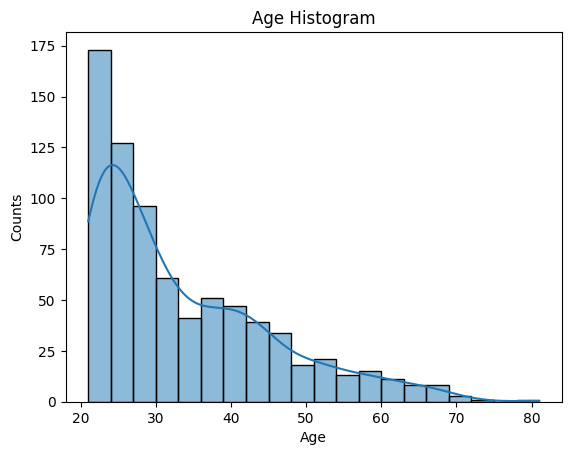

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()


Από το ιστόγραμμα και την χρήση kde (Kernel Density Estimate), παρατηρείται ότι η κατανομή είναι συγκεντρωμένη στην αριστερή πλευρά (right skewed) του άξονα, έχει κορυφή κοντά στην αρχή του άξονα και μειώνεται. Άρα μοιάζει με εκθετική κατανομή  που αρχίζει αντί του 0 στο 20 και έχει ένα μικρό ύψωμα κοντά στο 40.<br>
Στη συγκεκριμένη εφαρμογή στόχος είναι η πρόβλεψη διαβήτη. Από την κατανομή της ηλικίας φαίνεται να υπάρχουν περισσότερα δείγμα ηλικίας 20-30 ετών κάτι που σημαίνει ότι οι προβλέψεις του μοντέλου θα εστιάζουν σε αυτές τις ηλικίες. Προτιμότερη θα ήταν ίσως η κανονική κατανομή για να είναι πιο ίσα κατανεμημένες οι ηλικίες των δειγμάτων.

#ΕΡΩΤΗΜΑ 4

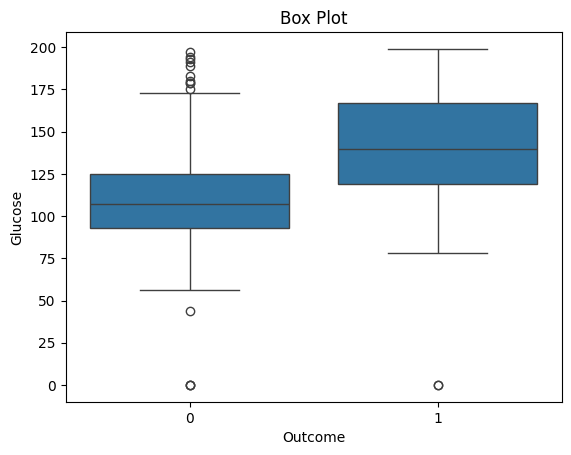

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

Από το boxplot για τις μεταβλητές γλυκόζης (συνεχής) και διαβήτη (δυαδική), παρατηρείται ότι οι ασθενείς που έχουν διαβητη (Outcome:1) έχουν υψηλότερες τιμές γλυκόζης από όσους δεν έχουν διαβήτη (Outcome:0), καθώς και η διάμεσος γλυκόζης των ατόμων που έχουν διαβήτη είναι περίπου 130 ενώ όσων δεν έχουν διαβήτη περίπου 110 (χαμηλότερα). Επομένως από τα δεδομένα φαίνεται να υπάρχει συσχέτιση της τιμής της γλυκόζης με την ύπαρξη διαβήτη.

#ΕΡΩΤΗΜΑ 5

Διαχωρισμός δεδομένων σε x, y.

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

Διαχωρισμός δεδομένων σε train-validation με ποσοστό 70-30 και random seed:0

In [ ]:
seed = 0
test_size = 0.3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((537, 8), (537,), (231, 8), (231,))

#ΕΡΩΤΗΜΑ 6

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
#In training set
y_pred_tr = model.predict(x_train)
#print(y_pred_tr)

accuracy = accuracy_score(y_train, y_pred_tr)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')


#In testing set (named val)
y_pred = model.predict(x_val)
#print(y_pred)

accuracy = accuracy_score(y_val, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 76.54
The accuracy of the model is: 77.92


Παρατηρείται ότι η ακρίβεια του test set είναι λίγο μεγαλύτερη από αυτή του train set, κάτι που μπορεί να αποτελεί ένδειξη ότι το μοντέλο αποδίδει καλά σε νέα δεδομένα που δεν έχει ξαναδεί και ότι δεν υπάρχει overfitting.

#ΕΡΩΤΗΜΑ 7

In [ ]:
mask_1 = x_val[:, 7] < 26
x_val_1=x_val[mask_1]
y_val_1=y_val[mask_1]

mask_2 = (x_val[:, 7] > 24) & (x_val[:, 7] < 51)
x_val_2=x_val[mask_2]
y_val_2=y_val[mask_2]

mask_3 = x_val[:, 7] > 49
x_val_3=x_val[mask_3]
y_val_3=y_val[mask_3]

y_pred_1 = model.predict(x_val_1)
accuracy_1 = accuracy_score(y_val_1, y_pred_1)
accuracy_percentage_1 = round(accuracy_1*100, 2)
print(f'The accuracy of the model 0-25 is: {accuracy_percentage_1}')

y_pred_2 = model.predict(x_val_2)
accuracy_2 = accuracy_score(y_val_2, y_pred_2)
accuracy_percentage_2 = round(accuracy_2*100, 2)
print(f'The accuracy of the model 25-50 is: {accuracy_percentage_2}')

y_pred_3 = model.predict(x_val_3)

accuracy_3 = accuracy_score(y_val_3, y_pred_3)
accuracy_percentage_3 = round(accuracy_3*100, 2)
print(f'The accuracy of the model >50 is: {accuracy_percentage_3}')

The accuracy of the model 0-25 is: 85.56
The accuracy of the model 25-50 is: 72.79
The accuracy of the model >50 is: 87.5


Bar Plot

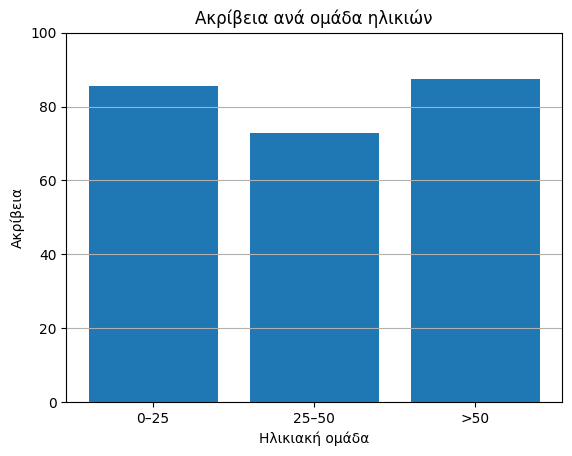

In [ ]:
import matplotlib.pyplot as plt

# Ετικέτες και τιμές ακρίβειας
labels = ['0–25', '25–50', '>50']
accuracies = [accuracy_percentage_1, accuracy_percentage_2, accuracy_percentage_3]

plt.bar(labels, accuracies)
plt.title('Ακρίβεια ανά ομάδα ηλικιών')
plt.xlabel('Ηλικιακή ομάδα')
plt.ylabel('Ακρίβεια')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


Παρατηρείται ότι για τις ηλικιακές ομάδες 0-25 και >50, ο ταξινομητής φαίνεται να προβλέπει καλά, καθώς η ακρίβεια είναι πάνω από 80%. Στην ηλικιακή ομάδα 25-50 η ακρίβεια είναι χαμηλότερη (70%), που σημαίνει πως για αυτήν την ομάδα ο ταξινομητής πετυχαίνει λιγότερα σωστά συγκριτικά με τις άλλες.

#ΕΡΩΤΗΜΑ 8

Εφόσον πρόκειται για ιατρική εφαρμογή, χειρότερο είναι η πρόβλεψη ότι κάποιος δεν έχει διαβήτη ενώ έχει παρά το αντίθετο. Στην περίπτωση που προβλέπει έναν ασθενή άνθρωπο ως υγιή, υπάρχουν άμεσες επιπτώσεις στην υγεία του καθώς παραβλέπει το πρόβλημα, ενώ στην αντίθετη περίπτωση οι περαιτέρω εξετάσεις θα δείξουν τη λάθος διάγνωση, χωρίς κίνδυνο στην υγεία του.

#ΕΡΩΤΗΜΑ 9

In [ ]:
test_size = 0.3
accuracies_tr = []
accuracies = []


for i in range(10):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=i)
  #6
  model = LogisticRegression(max_iter=1000, random_state=i)
  model.fit(x_train, y_train)

  #In training set
  y_pred_tr = model.predict(x_train)
  accuracy1 = accuracy_score(y_train, y_pred_tr)
  accuracies_tr.append(accuracy1)

  #In testing set (named val)
  y_pred = model.predict(x_val)
  accuracy = accuracy_score(y_val, y_pred)
  accuracies.append(accuracy)


mean_accuracy = np.mean(accuracies_tr)
std_accuracy = np.std(accuracies_tr)
print(f'Μέσος όρος ακρίβειας: {round(mean_accuracy*100, 2)}')
print(f'Τυπική απόκλιση ακρίβειας: {round(std_accuracy*100, 2)}')

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Μέσος όρος ακρίβειας: {round(mean_accuracy*100, 2)}')
print(f'Τυπική απόκλιση ακρίβειας: {round(std_accuracy*100, 2)}')






Μέσος όρος ακρίβειας: 77.65
Τυπική απόκλιση ακρίβειας: 1.22
Μέσος όρος ακρίβειας: 77.27
Τυπική απόκλιση ακρίβειας: 1.87


#ΕΡΩΤΗΜΑ 10

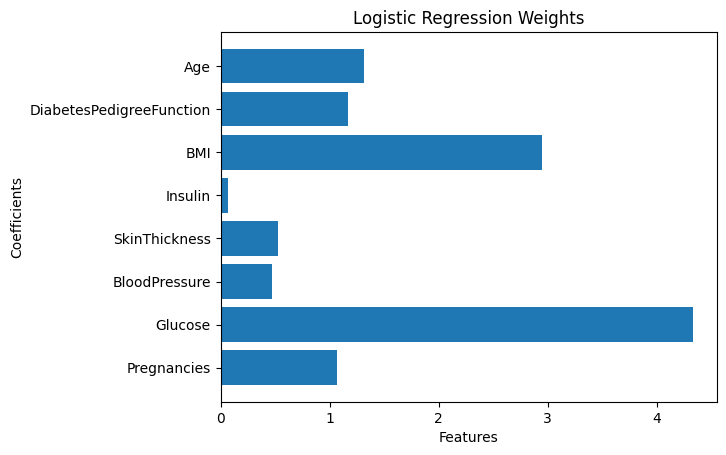

In [ ]:
seed = 0
test_size = 0.3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

#Κανονικοποίηση
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train_scaled, y_train)
y_pred_tr = model.predict(x_val_scaled)


coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Οι μεταβλητές που φαίνεται να επηρρεαζουν περισσότερο το μοντέλο είναι αρχικά η γλυκόζη (Glucose), μετά το BMI, και τέλος η ηλικία, καθώς αυτές έχουν την μεγαλύτερη απόλυτη τιμή.

#Μέρος 2- Γραμμική Παλινδρόμηση

#ΕΡΩΤΗΜΑ 1

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = pd.read_csv('diabetes.csv')
targets_df = df['Glucose']

x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].to_numpy()
y = targets_df.to_numpy()
print(x.shape, y.shape)

seed = 0
test_size = 0.3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(768, 4) (768,)


((537, 4), (537,), (231, 4), (231,))

#ΕΡΩΤΗΜΑ 2

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 929.89
Mean Absolute Error (MAE): 23.60


Το MAE χρησιμοποιεί απόλυτη τιμή, οπότε έχει μεγαλύτερη ανθεκτικότητα σε outliers, ενώ το MSE λόγω των τετραγώνων, είναι πιο ευαισθητο σε σημαντικά λάθη, καθώς μεγαλώνει τις τιμές τους ακόμα περισσότερο. Γενικά όσο πιο χαμηλές οι τιμές των MSE, MAE τόσο καλύτερα προβλέπει το μοντέλο. Από τις δύο, χαμηλότερη είναι το MAE. Εφόσον στα δεδομένα, παρατηρούνται αρκετά outliers και σημεία με υψήλοτερη σχνότητα εμφάνισης από αλλα, το MAE φαίνεται να είναι καλύτερη επιλογή.

#ΕΡΩΤΗΜΑ 3

In [ ]:
# Δημιουργία μοντέλου
clf = linear_model.Lasso(alpha=0.1)

# Εκπαίδευση
clf.fit(x_train, y_train)

# Πρόβλεψη
y_pred = clf.predict(x_val)

# Αξιολόγηση
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

alphas=[0.2, 0.4, 0.6, 0.8, 1.0]
metrics=[]

for a in alphas:
  clf = linear_model.Lasso(alpha=a)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_val)
  mae = mean_absolute_error(y_val, y_pred)
  metrics.append({'Alpha':a, 'MAE':mae})


metrics_f = pd.DataFrame(metrics)
print(metrics_f)

   Alpha        MAE
0    0.2  23.594203
1    0.4  23.588415
2    0.6  23.582629
3    0.8  23.576843
4    1.0  23.571058


#ΕΡΩΤΗΜΑ 4

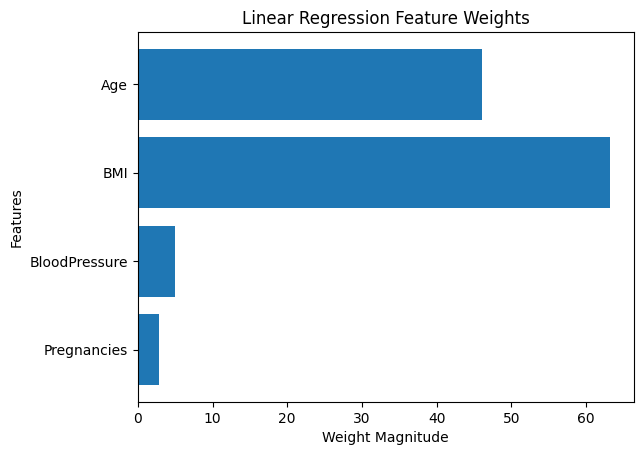

In [ ]:
seed = 0
test_size = 0.3
feature_names = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=seed)

# Κανονικοποίηση
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_val_scaled)

coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(feature_names, importance_weights)
plt.title('Linear Regression Feature Weights')
plt.xlabel('Weight Magnitude')
plt.ylabel('Features')
plt.show()


Λιγότερο σημαντικός φαίνεται να είναι ο δείκτης Pregnancies, καθώς έχει τη μικρότερη τιμή.

Αφαίρεση του χαρακτηριστικού Pregnancies

In [ ]:
x = df[['BloodPressure', 'BMI', 'Age']].to_numpy()
y = targets_df.to_numpy()
print(x.shape, y.shape)

seed = 0
test_size = 0.3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

(768, 3) (768,)
Mean Squared Error (MSE): 930.40
Mean Absolute Error (MAE): 23.59


Στο ερώτημα 2 το μοντέλο έδωσε MSE: 929.89 , MAE:23.60 και τώρα χωρίς τη μεταβλητή έδωσε MSE:930.40, MAE: 23.59. Παρατηροείται ότι στο MAE η διαφορά είναι πολύ μικρή, ενώ στο MSE είναι λίγο μεγαλύτερη ( 0.51). Και στις δύο περιπτώσεις πάντως η διαφορά δεν ήταν ιδιαίτερα σημαντικη. Το συγκεκριμένο χαρακτηριστικό δηλαδή δεν φαίνεται να έχει σημαντική συνεισφορά στην πρόβλεψη γλυκόζης και θα μπορούσε να αφαιρεθεί.